# CMT307 Coursework 1



**Student Number: C21010417**

### I can confirm this code runs in Jupyter

### Cells that run the random grid searches have been commented out because they take a while to run, the best outputs have been recorded beneath them in markdown.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings 

warnings. simplefilter('ignore')


In [2]:
# Data read in
df = pd.read_csv('Coursework_1_data.csv')

# Data exploration

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# List number of rows, null count and data types. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

*No nulls in any columns, nice!*

In [5]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [6]:
ycounts_alldata=df['Revenue'].value_counts()
print(ycounts_alldata)

False    10422
True      1908
Name: Revenue, dtype: int64


*The dataset is rather unbalanced.*

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


*Looking at the standard deviation, mean and max values of some of the duration/rate features, one can only assume there is outliers.* 

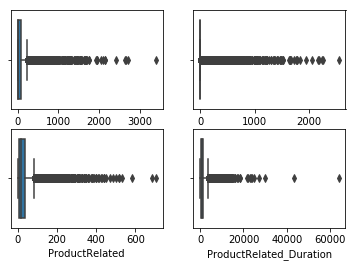

In [8]:
# Plotting boxplots for the 4 variables with the highest standard deviation
fig, axes =plt.subplots(2,2)
sns.boxplot(df.Administrative_Duration, ax=axes[0,0])
sns.boxplot(df.Informational_Duration, ax=axes[0,1])
sns.boxplot(df.ProductRelated, ax=axes[1,0])
sns.boxplot(df.ProductRelated_Duration, ax=axes[1,1])


*All of these variables have a large number of outliers. I will do z-score rejection to remove all samples that are over 3 standard deviations from the median, as the mean will be skewed by the extreme outliers.*

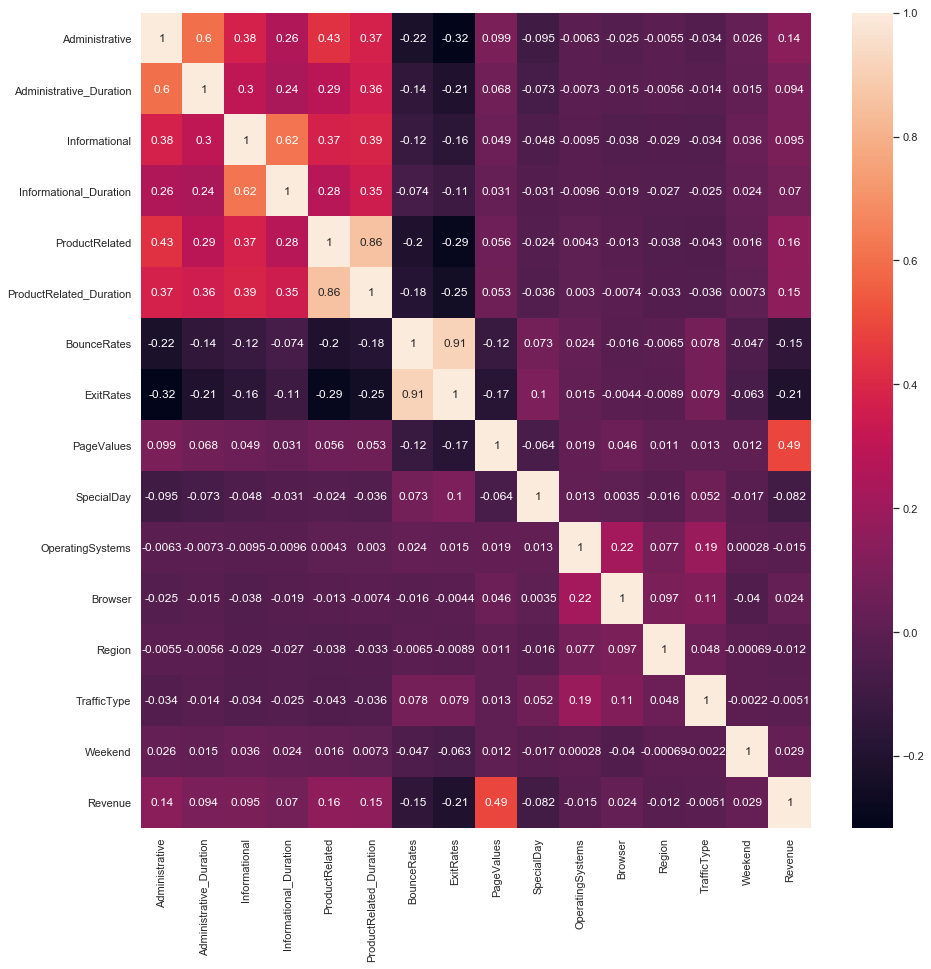

In [9]:
# Finding correlation between numeric variables
correlation_heatmap = df.corr()
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(correlation_heatmap, annot=True)

*There is a lot of coviarance going on in the top right. The bottom half do not correlate with Revenue, the top half correlate more. The strongest correlation is with PageValues.*

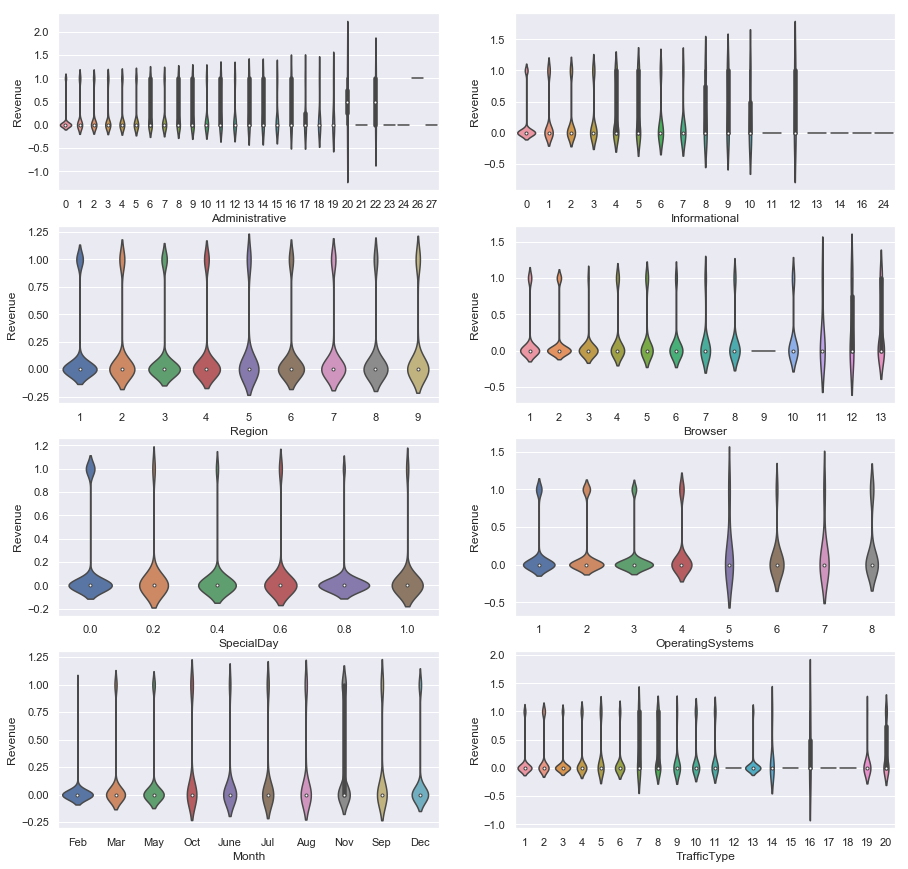

In [10]:
f, axes= plt.subplots(4,2, figsize=(15,15))

sns.violinplot(x="Administrative",y='Revenue',data=df, ax=axes[0,0])
sns.violinplot(x="Informational",y='Revenue',data=df, ax=axes[0,1])
sns.violinplot(x="Browser",y='Revenue',data=df, ax=axes[1,1])
sns.violinplot(x="Region",y='Revenue',data=df, ax=axes[1,0])
sns.violinplot(x="OperatingSystems",y='Revenue',data=df, ax=axes[2,1])
sns.violinplot(x="SpecialDay",y='Revenue',data=df, ax=axes[2,0])
sns.violinplot(x="Month",y='Revenue',data=df, ax=axes[3,0])
sns.violinplot(x="TrafficType",y='Revenue',data=df, ax=axes[3,1])

*Nothing very insightful with these categoricals.*

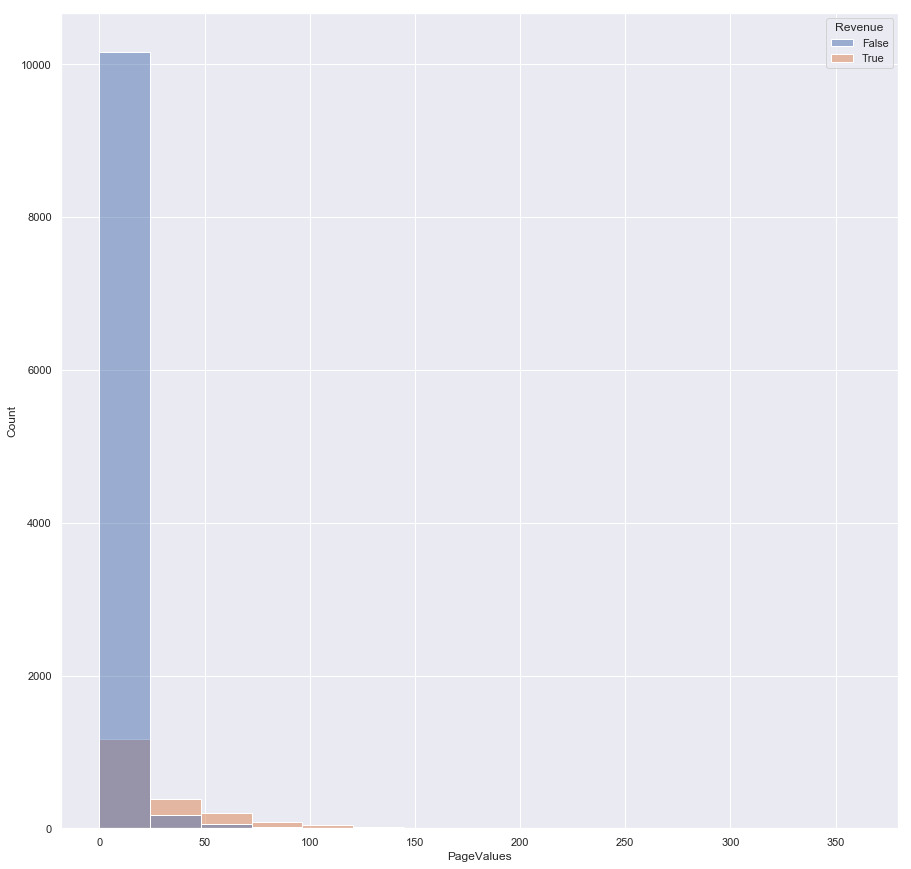

In [11]:
sns.histplot(data=df, x=df.PageValues, hue=df.Revenue)

(0, 1250)

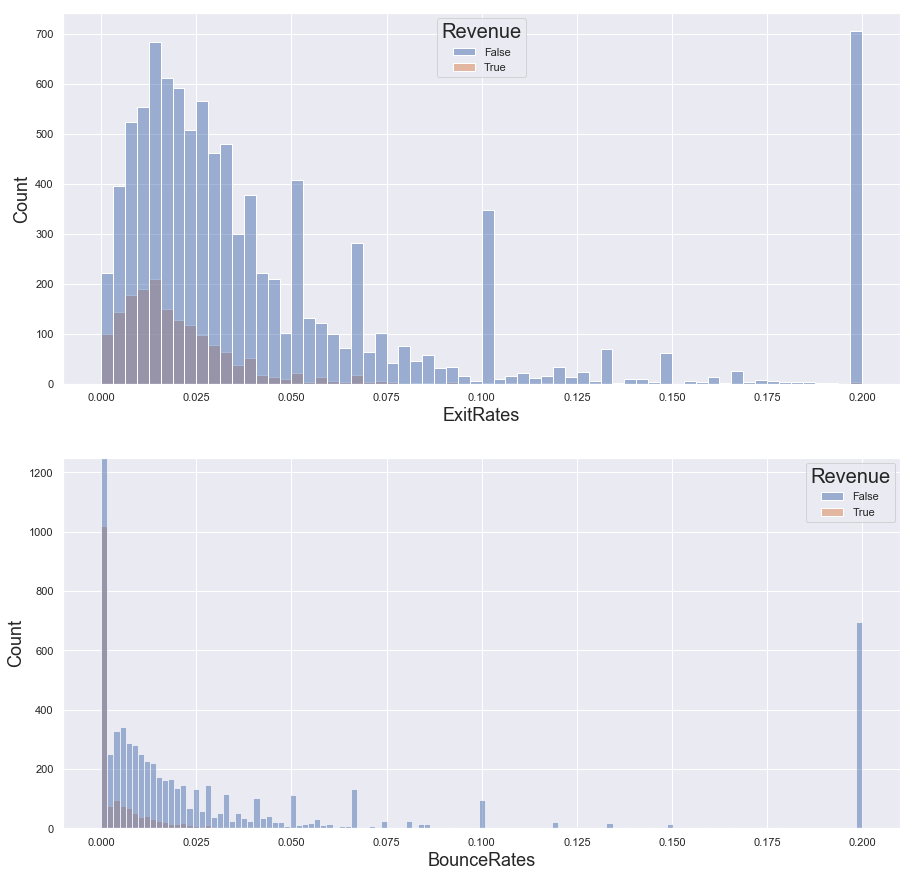

In [102]:
fig, axes =plt.subplots(2)
p1=sns.histplot(data= df, x=df.ExitRates, hue=df.Revenue, ax=axes[0])
p1.set_xlabel("ExitRates",fontsize=18)
p1.set_ylabel("Count",fontsize=18)
p2=sns.histplot(data= df, x=df.BounceRates,hue=df.Revenue, ax=axes[1])
p2.set_xlabel("BounceRates",fontsize=18)
p2.set_ylabel("Count",fontsize=18)
p2.set_ylim(0,1250)

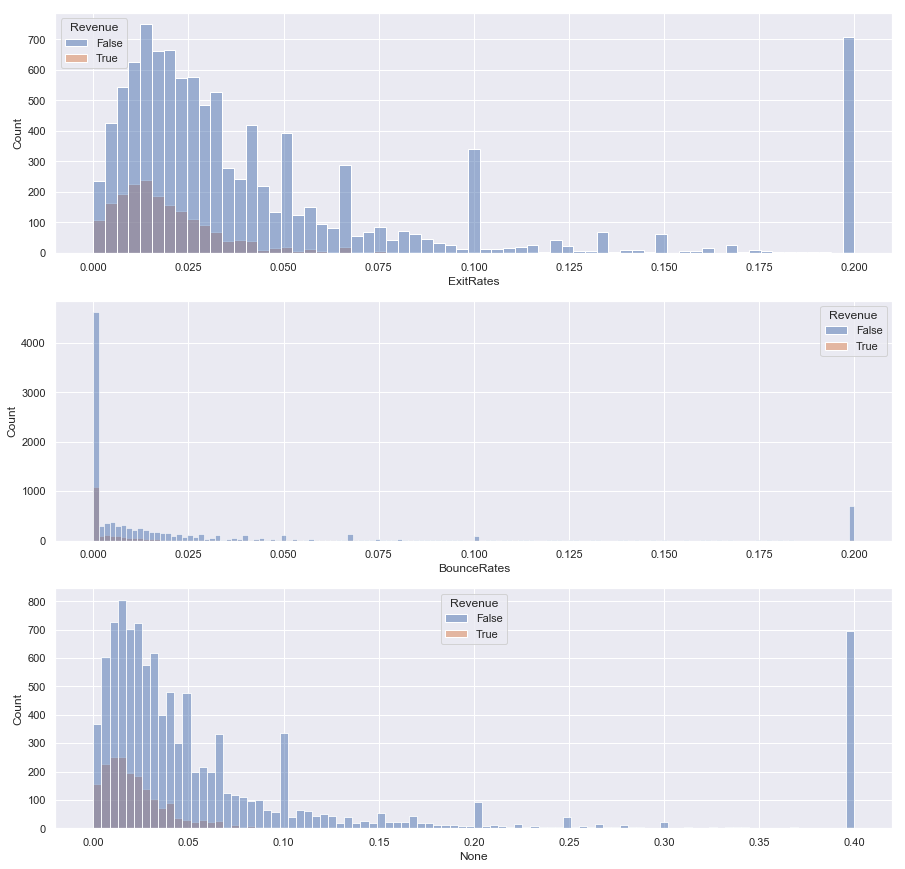

In [12]:
fig, axes =plt.subplots(3)
sns.histplot(data= df, x=df.ExitRates, hue=df.Revenue, ax=axes[0])
sns.histplot(data= df, x=df.BounceRates,hue=df.Revenue, ax=axes[1])
sns.histplot(data= df, x=(df.BounceRates +df.ExitRates),hue=df.Revenue, ax=axes[2])

# Data preprocessing

In [13]:
import scipy.stats as sp

# Creating a zscore (using median) column for each of the 4 variables above.
df['zscore_administrative_duration']=(df['Administrative_Duration']-df['Administrative_Duration'].median())/df['Administrative_Duration'].std()
df['zscore_informational_duration']=(df['Informational_Duration']-df['Informational_Duration'].median())/df['Informational_Duration'].std()
df['zscore_product_related']=(df['ProductRelated']-df['ProductRelated'].median())/df['ProductRelated'].std()
df['zscore_product_related_duration']=(df['ProductRelated_Duration']-df['ProductRelated_Duration'].median())/df['ProductRelated_Duration'].std()



In [14]:
# Keeping an original df
df_raw = df
# Removing rows with z-score of over 3
df = df.loc[(df['zscore_administrative_duration'] < 3)]
df = df.loc[(df['zscore_informational_duration'] <3)]                  
df = df.loc[(df['zscore_product_related'] <3)] 
df = df.loc[(df['zscore_product_related_duration']< 3)]
df = df[df.columns[0:18]]
ycounts_outliers_removed=(df['Revenue'].value_counts())

print('Revenue = False rows removed = ',ycounts_alldata[0]-ycounts_outliers_removed[0] ,' , Revenue = True rows removed = ',ycounts_alldata[1]-ycounts_outliers_removed[1])


Revenue = False rows removed =  593  , Revenue = True rows removed =  236


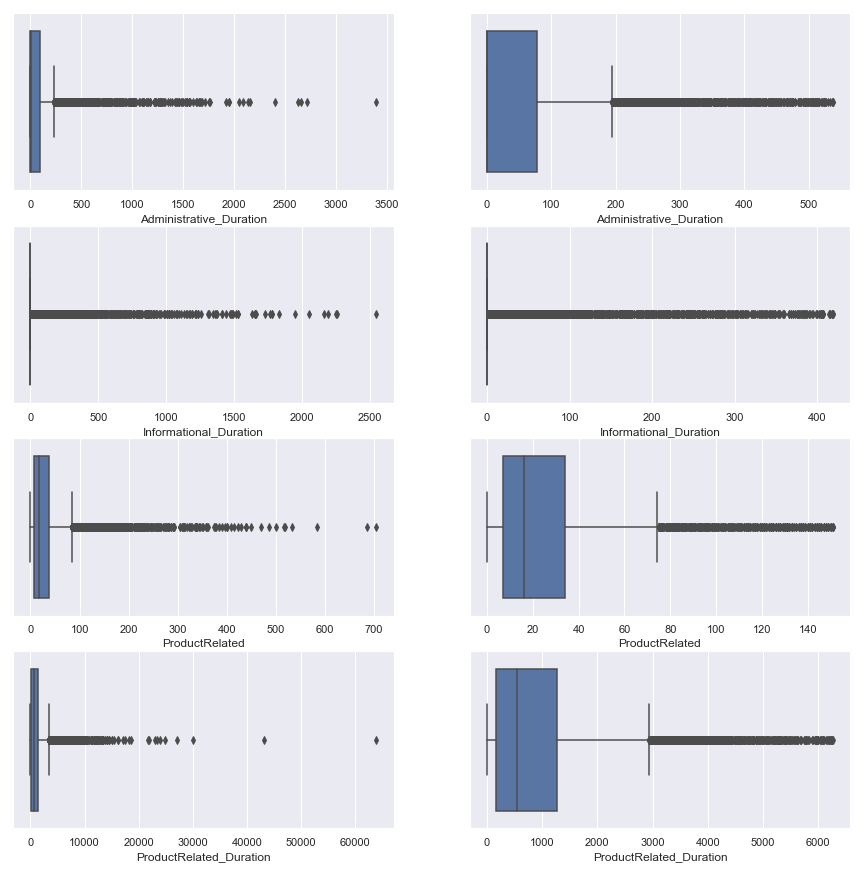

In [52]:
# Plotting boxplots for the 4 variables with the highest standard deviation
f, axes= plt.subplots(4,2, figsize=(15,15))
plt.rcParams['font.size'] = '20'
sns.boxplot(df_raw.Administrative_Duration, ax=axes[0,0])
sns.boxplot(df.Administrative_Duration, ax=axes[0,1])
sns.boxplot(df_raw.Informational_Duration, ax=axes[1,0])
sns.boxplot(df.Informational_Duration, ax=axes[1,1])
sns.boxplot(df_raw.ProductRelated, ax=axes[2,0])
sns.boxplot(df.ProductRelated, ax=axes[2,1])
sns.boxplot(df_raw.ProductRelated_Duration, ax=axes[3,0])
sns.boxplot(df.ProductRelated_Duration, ax=axes[3,1])

*The box-plots look much better representative of the data on the right, without outliers.*

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000,11501.000000
mean,1.982871,56.038245,0.372055,15.356686,25.275889,919.822441,0.023322,0.044724,5.715668,0.063316,2.124424,2.360838,3.158682,4.102165
std,2.890428,93.804684,0.988410,52.209009,26.565174,1076.352812,0.049943,0.049774,18.590946,0.201458,0.918834,1.731009,2.408489,4.043341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,165.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,16.000000,535.500000,0.002899,0.026667,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,77.500000,0.000000,0.000000,34.000000,1271.333333,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,23.000000,537.500000,12.000000,419.000000,151.000000,6266.208586,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [17]:
from sklearn.model_selection import train_test_split
Y = df['Revenue']
X= df.drop('Revenue', axis=1,inplace=False)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Feature engineering

In [18]:
# The mean time spent on each page for administrative, informational and product related
def MeanPageTime(x):
        x['MeanPageAdminTime'] = (x['Administrative'] / x['Administrative_Duration']).fillna(0)
        x['MeanPageTimeInformational'] = (x['Informational'] / x['Informational_Duration']).fillna(0)
        x['MeanPageTimeProduct'] = (x['ProductRelated'] / x['ProductRelated_Duration']).fillna(0)
        x = x.replace([np.inf, -np.inf], 0)
        return x
# Total time spent on the site    
def TotalWebsiteTime(x):
    x['TotalTime'] = x['Administrative_Duration'] + x['Informational_Duration'] + x['ProductRelated_Duration']
    return x

# The sum of exit and bounce rates
def ExitBounceSum(x):
    x['ExitBounceSum'] = x['BounceRates'] + x['ExitRates']
    return x

# Creating new feature on both the training and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = TotalWebsiteTime(x_train)
x_test = TotalWebsiteTime(x_test)
x_train = MeanPageTime(x_train)
x_test = MeanPageTime(x_test)
x_train1 = ExitBounceSum(x_train)
x_test1 = ExitBounceSum(x_test)

###  Pipeline construction

In [19]:
# Grouping features to chose which processes they go through
categoric_features = ['Month', 'VisitorType', 'Weekend']
numeric_features = x_train.select_dtypes(['int64','float64']).columns
# These features are riden with outliers, to combat this I will bin them into a low number of bins
bin_features1 = ['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration']
# These features don't have outliers so I will bin them into a high number of bins
bin_features2 =['PageValues', 'TotalTime', 'ExitBounceSum','MeanPageAdminTime','MeanPageTimeInformational', 'MeanPageTimeProduct', 'BounceRates','ExitRates']
bin_features_all = ['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration', 'PageValues', 'TotalTime', 'ExitBounceSum','MeanPageAdminTime','MeanPageTimeInfomational', 'MeanPageTimeProduct', 'BounceRates','ExitRates']
numeric_features = np.setdiff1d(numeric_features,bin_features_all)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,  KBinsDiscretizer , StandardScaler
from sklearn.compose import ColumnTransformer

# transformer for categorical features
categorical_transformer = Pipeline([('onehot', OneHotEncoder())])
   
# transformer for numerical features
numeric_transformer = Pipeline([('scaler', StandardScaler())])

# binning transformer
bin_transformer1 = Pipeline([('kbins', KBinsDiscretizer(n_bins=11, encode='ordinal', strategy='quantile'))])


# binning transformer 2- better constrained parameters so more bins
bin_transformer2 = Pipeline([('kbins', KBinsDiscretizer(n_bins=300, encode='ordinal', strategy='quantile'))])

# Combining all transformer into a single variable
preproc = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categoric_features),
        ('numeric_no_binning', numeric_transformer, numeric_features),
        ('binning1', bin_transformer1, bin_features1),
        ('binning2', bin_transformer2, bin_features2)
    ],
    remainder = 'passthrough'

)

# Model implementation

In [21]:
from sklearn.metrics import classification_report, recall_score,confusion_matrix,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost

# Initial models with default parameters
gb =GradientBoostingClassifier()
lr=LogisticRegression()
forest=RandomForestClassifier()
svm = SVC()
dec_tree =  DecisionTreeClassifier()

models = [gb, lr, forest,  svm, dec_tree]
class_reports = []
model_reports = {}

# Testing models with default parameters
for i, model in enumerate(models):
    full_pipe = Pipeline(steps=[('preprocessing', preproc),
                                    ('model', model)])
    yhat = full_pipe.fit(x_train1,y_train).predict(x_test1)
    model_reports[i] = classification_report(y_test, yhat)
    
for i in range(0,len(models)):
    print('Model used: ',models[i])
    print(model_reports[i])


Model used:  GradientBoostingClassifier()
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1980
        True       0.72      0.65      0.68       321

    accuracy                           0.92      2301
   macro avg       0.83      0.81      0.82      2301
weighted avg       0.91      0.92      0.91      2301

Model used:  LogisticRegression()
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      1980
        True       0.72      0.55      0.62       321

    accuracy                           0.91      2301
   macro avg       0.82      0.76      0.78      2301
weighted avg       0.90      0.91      0.90      2301

Model used:  RandomForestClassifier()
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      1980
        True       0.77      0.59      0.67       321

    accuracy                           0.92      2301
   macro avg  

*The best classifiers are Random forest, gradient boosting and SVM. For this reason, I shall choose random forest, gradient boosting and SVM.*

### Feature selection - SelectKBest

In [22]:
# Feature selection pipe
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif


feature_pipe = Pipeline([
                        ('preprocessing', preproc),
                        ('selectKBest', SelectKBest(f_classif, k=15)),
                        ('RFinpipe',forest)])

param_grid ={'selectKBest__k': [10,15,25,30,35]}

grid_search = GridSearchCV(feature_pipe,param_grid, scoring = 'f1')
grid_search.fit(x_train1, y_train)
print(grid_search.best_params_)
print('best score:  ',grid_search.best_score_)
yhat = (grid_search.best_estimator_).predict(x_test1)
print(classification_report (y_test, yhat))

{'selectKBest__k': 15}
best score:   0.6450606084592646
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1980
        True       0.72      0.62      0.67       321

    accuracy                           0.91      2301
   macro avg       0.83      0.79      0.81      2301
weighted avg       0.91      0.91      0.91      2301



In [23]:
param_grid ={'selectKBest__k': [7,8,9,10,11,12,13]}

grid_search = GridSearchCV(feature_pipe,param_grid, scoring = 'f1')
grid_search.fit(x_train1, y_train)
print(grid_search.best_params_)
print('best score:  ',grid_search.best_score_)
yhat = (grid_search.best_estimator_).predict(x_test1)
print(classification_report (y_test, yhat))

{'selectKBest__k': 13}
best score:   0.6470235061113129
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      1980
        True       0.75      0.62      0.68       321

    accuracy                           0.92      2301
   macro avg       0.84      0.79      0.81      2301
weighted avg       0.91      0.92      0.91      2301



### Feature selection - random forest

In [24]:
from sklearn.feature_selection import SelectFromModel
feature_pipe = Pipeline([
                        ('preprocessing', preproc),
                        ('selectFRF', SelectFromModel(RandomForestClassifier(n_estimators=1000)))])

fitted= feature_pipe.fit(x_train1, y_train)
selected_features=fitted[1].get_support()

In [25]:
# List of all input features, including onehot columns
cols = list(feature_pipe.named_steps['preprocessing'].named_transformers_['categoricals'].named_steps['onehot'].get_feature_names(input_features=categoric_features))
cols.extend(numeric_features)
cols.extend(bin_features1)
cols.extend(bin_features2)

# Parameters selected by random forest
selected_params = pd.DataFrame([cols,selected_features])
pd.set_option('display.max_columns',None)
selected_params.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Administrative,Browser,Informational,MeanPageTimeInformational,OperatingSystems,Region,SpecialDay,TrafficType,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,TotalTime,ExitBounceSum,MeanPageAdminTime,MeanPageTimeInformational,MeanPageTimeProduct,BounceRates,ExitRates
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = TotalWebsiteTime(x_train)
x_test = TotalWebsiteTime(x_test)
x_train = MeanPageTime(x_train)
x_test = MeanPageTime(x_test)
x_train = ExitBounceSum(x_train)
x_test = ExitBounceSum(x_test)

# New x_train and x_test dataframes with only the features selected from the random forest
x_train2 = x_train[['MeanPageAdminTime','MeanPageTimeProduct','ExitBounceSum','TotalTime','PageValues','ProductRelated_Duration','ProductRelated','Administrative','BounceRates','ExitRates']]
x_test2 = x_test[['MeanPageAdminTime','MeanPageTimeProduct','ExitBounceSum','TotalTime','PageValues','ProductRelated_Duration','ProductRelated','Administrative','BounceRates','ExitRates']]

# Creating column lists for the transformers
bin_features1 = ['ProductRelated','ProductRelated_Duration']
bin_features2 =['PageValues', 'TotalTime', 'ExitBounceSum','MeanPageAdminTime', 'MeanPageTimeProduct', 'BounceRates','ExitRates']
bin_features_all = [['ProductRelated','ProductRelated_Duration','PageValues', 'TotalTime', 'ExitBounceSum','MeanPageAdminTime', 'MeanPageTimeProduct', 'BounceRates','ExitRates']]
numeric_features = ['Administrative']

# transformer for numerical features
numeric_transformer = Pipeline([('scaler', StandardScaler())])

# binning transformer1
bin_transformer1 = Pipeline([('kbins', KBinsDiscretizer(n_bins=11, encode='ordinal', strategy='quantile'))])

# binning transformer 2- better constrained parameters so more bins
bin_transformer2 = Pipeline([('kbins', KBinsDiscretizer(n_bins=300, encode='ordinal', strategy='quantile'))])

# Combining all transformers into one variable
preproc2 = ColumnTransformer(
    [
        ('numeric_no_binning', numeric_transformer, numeric_features),
        ('binning1', bin_transformer1, bin_features1),
        ('binning2', bin_transformer2, bin_features2)
    ],
    remainder = 'passthrough'
)

In [27]:
# Evaluating the model using random forest feature selection
full_pipeline2 = Pipeline(steps=[('preprocessing', preproc2),
                                    ('model', forest)])
full_pipeline2.fit(x_train2, y_train)
yhat = full_pipeline2.predict(x_test2)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1980
        True       0.73      0.63      0.68       321

    accuracy                           0.92      2301
   macro avg       0.84      0.79      0.81      2301
weighted avg       0.91      0.92      0.91      2301



**Better results are achieved by selecting feature using random forest.**

### Parameter random grid search - random forest

In [88]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Random forest random grid search
# REMOVE DOUBLE QUOTES TO RUN
"""
forest_pipe = Pipeline([
                        ('preprocessing', preproc2),
  
                        ('RFinpipe',forest)])

parameter_grid ={
                'RFinpipe__n_estimators': [300,500,750,1000,1200],
                'RFinpipe__class_weight': [ 'balanced'],
                'RFinpipe__max_features': ['auto', 'sqrt', 'log2'],
                'RFinpipe__max_depth' : [None],
                'RFinpipe__min_samples_split': [4,6,7,8,9,10],
                'RFinpipe__min_samples_leaf': [2,3,4,5,6], 
                'RFinpipe__n_jobs': [-1]
                 }



# define search
rand_search = RandomizedSearchCV(forest_pipe, parameter_grid, n_iter=50, scoring='f1', n_jobs=-1,cv=3,  random_state=42)
result = rand_search.fit(x_train2, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
yhat = (result.best_estimator_).predict(x_test2)
print(classification_report (y_test, yhat))
"""

Best Score: 0.6817817702666731
Best Hyperparameters: {'RFinpipe__n_jobs': -1, 'RFinpipe__n_estimators': 500, 'RFinpipe__min_samples_split': 10, 'RFinpipe__min_samples_leaf': 5, 'RFinpipe__max_features': 'auto', 'RFinpipe__max_depth': None, 'RFinpipe__class_weight': 'balanced'}
              precision    recall  f1-score   support

       False       0.96      0.92      0.94      1980
        True       0.61      0.78      0.69       321

    accuracy                           0.90      2301
   macro avg       0.79      0.85      0.81      2301
weighted avg       0.91      0.90      0.91      2301



**Best results from random search**

Best Score: 0.6801838126398584
Best Hyperparameters: {'RFinpipe__n_jobs': -1, 'RFinpipe__n_estimators': 1800, 'RFinpipe__min_samples_split': 11, 'RFinpipe__min_samples_leaf': 5, 'RFinpipe__max_features': 'sqrt', 'RFinpipe__max_depth': None, 'RFinpipe__class_weight': 'balanced'}
              precision    recall  f1-score   support

       False       0.96      0.92      0.94      1980
        True       0.62      0.79      0.69       321

    accuracy                           0.90      2301
   macro avg       0.79      0.86      0.82      2301
weighted avg       0.92      0.90      0.91      2301

### Parameter random grid search - gradient boost

In [89]:
# Gradient booster random grid search
# REMOVE DOUBLE QUOTES TO RUN
"""
gb_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('gb',gb)])
parameter_grid = {
    'gb__loss':['deviance'],
    'gb__learning_rate': [0.05, 0.075, 0.1, 0.15, 0.2, 0,25],
    'gb__min_samples_split': np.linspace(0.1, 0.5, 12),
    'gb__min_samples_leaf': np.linspace(0.1, 0.5, 12),
    'gb__max_depth':[10,15,20,None],
    'gb__max_features':["log2"],
    'gb__criterion': ["friedman_mse"],
    'gb__subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    'gb__n_estimators':[200,400,800,1000]
    }

# define search
rand_search = RandomizedSearchCV(gb_pipe, parameter_grid, n_iter=50, scoring='f1', n_jobs=-1,cv=3,  random_state=42)
result = rand_search.fit(x_train2, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
yhat = (result.best_estimator_).predict(x_test2)
print(classification_report (y_test, yhat))
""""""

Best Score: 0.6493057019164614
Best Hyperparameters: {'gb__subsample': 1.0, 'gb__n_estimators': 400, 'gb__min_samples_split': 0.2090909090909091, 'gb__min_samples_leaf': 0.17272727272727273, 'gb__max_features': 'log2', 'gb__max_depth': 10, 'gb__loss': 'deviance', 'gb__learning_rate': 0.05, 'gb__criterion': 'friedman_mse'}
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1980
        True       0.71      0.65      0.68       321

    accuracy                           0.91      2301
   macro avg       0.83      0.81      0.82      2301
weighted avg       0.91      0.91      0.91      2301



**The best results from random search.**


Best Score: 0.6493057019164614
Best Hyperparameters: {'gb__subsample': 1.0, 'gb__n_estimators': 400, 'gb__min_samples_split': 0.2090909090909091, 'gb__min_samples_leaf': 0.17272727272727273, 'gb__max_features': 'log2', 'gb__max_depth': 10, 'gb__loss': 'deviance', 'gb__learning_rate': 0.05, 'gb__criterion': 'friedman_mse'}
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1980
        True       0.71      0.65      0.68       321

    accuracy                           0.91      2301
   macro avg       0.83      0.81      0.82      2301
weighted avg       0.91      0.91      0.91      2301

### Parameter random grid search - SVM 

In [90]:
# SVM random grid search
# max_iter must be limited when doing a grid search otherwise it gets stuck

# REMOVE DOUBLE QUOTES TO RUN
"""
svm_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('svmm',svm)])


parameter_grid = {
    'svmm__kernel': ['linear','rbf','poly'], 
    'svmm__C': np.linspace(1,100000,50),
    'svmm__max_iter' : [500000]
    }


# define search
rand_search = RandomizedSearchCV(svm_pipe, parameter_grid, n_iter=50, scoring='f1', n_jobs=-1,cv=3,  random_state=42)
result = rand_search.fit(x_train2, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
yhat = (result.best_estimator_).predict(x_test2)
print(classification_report (y_test, yhat))
"""

Best Score: 0.6281844412206832
Best Hyperparameters: {'svmm__max_iter': 500000, 'svmm__kernel': 'rbf', 'svmm__C': 10204.979591836734}
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      1980
        True       0.74      0.58      0.65       321

    accuracy                           0.91      2301
   macro avg       0.84      0.77      0.80      2301
weighted avg       0.91      0.91      0.91      2301



**Best results from random search**

Best Score: 0.6281844412206832
Best Hyperparameters: {'svmm__max_iter': 500000, 'svmm__kernel': 'rbf', 'svmm__C': 10204.979591836734}
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      1980
        True       0.74      0.58      0.65       321

    accuracy                           0.91      2301
   macro avg       0.84      0.77      0.80      2301
weighted avg       0.91      0.91      0.91      2301

### Final parameterised models

In [91]:
# Random forest
forest = RandomForestClassifier(n_estimators=1800, max_depth=None, min_samples_split=11, min_samples_leaf=5,
                                max_features= 'auto', class_weight= 'balanced')  
# Gradient booster
gb = GradientBoostingClassifier(subsample = 1, n_estimators =400, min_samples_split=0.21, min_samples_leaf=0.17, max_features = 'log2',
                               max_depth = None, loss='deviance', learning_rate=0.05, criterion='friedman_mse')
# SVM
svm = SVC(max_iter=-1, kernel='rbf', C=10205)

### Imbalanced data solutions

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Grid search to find optimal k_neighbors for the SMOTE function
# REMOVE DOUBLE QUOTES TO RUN
"""
smote_pipe = Pipeline([
                      ('preprocessing', preproc2),
                      ('smote', SMOTE(k_neighbors=10)),
                      ('RFinpipe', forest)    
])
param_grid ={'smote__k_neighbors': [10,12,14,16,18]}

grid_search = GridSearchCV(smote_pipe,param_grid, scoring = 'f1')
grid_search.fit(x_train2, y_train)
print(grid_search.best_params_)
print('best score:  ',grid_search.best_score_)
yhat = (grid_search.best_estimator_).predict(x_test2)
print(classification_report (y_test, yhat))
"""


"\nsmote_pipe = Pipeline([\n                      ('preprocessing', preproc2),\n                      ('smote', SMOTE(k_neighbors=10)),\n                      ('RFinpipe', forest)    \n])\nparam_grid ={'smote__k_neighbors': [10,12,14,16,18]}\n\ngrid_search = GridSearchCV(smote_pipe,param_grid, scoring = 'f1')\ngrid_search.fit(x_train2, y_train)\nprint(grid_search.best_params_)\nprint('best score:  ',grid_search.best_score_)\nyhat = (grid_search.best_estimator_).predict(x_test2)\nprint(classification_report (y_test, yhat))\n"

### Paramterised models and predictions without SMOTE

In [92]:
# Pipeline with random forest estimator
forest_pipe = Pipeline([
                        ('preprocessing', preproc2),  
                        ('model',forest)])
forest_pipe.fit(x_train2, y_train)
yhat_rf = forest_pipe.predict(x_test2)

# Pipeline with gradient boosting estimator
gb_pipe = Pipeline([
                        ('preprocessing', preproc2),         
                        ('model',gb)])
gb_pipe.fit(x_train2, y_train)
yhat_gb = gb_pipe.predict(x_test2)

# Pipeline with SVM estimator
svm_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('model',svm)])
svm_pipe.fit(x_train2, y_train)
yhat_svm = svm_pipe.predict(x_test2)

### Parameterised models and predictions with SMOTE

In [93]:
forest_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('smote', SMOTE(k_neighbors=16)),
                        ('model',forest)])
forest_pipe.fit(x_train2, y_train)
yhat_rf_smote = forest_pipe.predict(x_test2)


gb_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('smote', SMOTE(k_neighbors=16)),
                        ('model',gb)])
gb_pipe.fit(x_train2, y_train)
yhat_gb_smote = gb_pipe.predict(x_test2)


svm_pipe = Pipeline([
                        ('preprocessing', preproc2),
                        ('smote', SMOTE(k_neighbors=16)),
                        ('model',svm)])

svm_pipe.fit(x_train2, y_train)
yhat_svm_smote = svm_pipe.predict(x_test2)

# Performance evaluation

### Model evaluation without SMOTE

Random Forest AUC =  0.72
Random Forest F1 =  0.7
Gradient Booster AUC =  0.7
Gradient Booster F1 =  0.68
SVM AUC =  0.69
SVM F1 =  0.65
Random Forest AUC with SMOTE =  0.72
Random Forest F1 with SMOTE =  0.69
Gradient Booster AUC with SMOTE =  0.7
Gradient Booster F1 with SMOTE =  0.69
SVM AUC with SMOTE =  0.69
SVM F1 with SMOTE =  0.66


Text(0,0.5,'PRECISION')

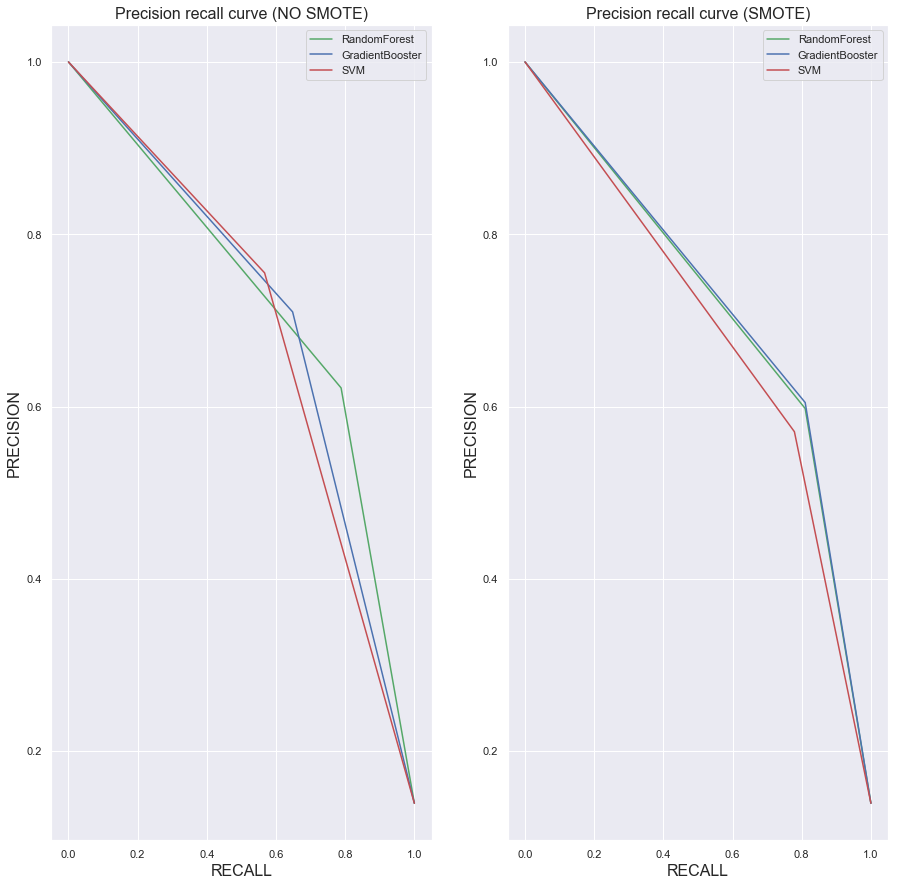

In [96]:
from sklearn.metrics import precision_recall_curve, auc,f1_score

# Evaluating model with F1 score and AUC - WITHOUT SMOTE
rf_prec, rf_rec, _ = precision_recall_curve(y_test, yhat_rf)
print('Random Forest AUC = ',round(auc(rf_rec , rf_prec),2))
print('Random Forest F1 = ',round(f1_score(y_test, yhat_rf),2))
gb_prec, gb_rec, _ = precision_recall_curve(y_test, yhat_gb)
print('Gradient Booster AUC = ',round(auc(gb_rec , gb_prec),2))
print('Gradient Booster F1 = ',round(f1_score(y_test, yhat_gb),2))
svm_prec, svm_rec, _ = precision_recall_curve(y_test, yhat_svm)
print('SVM AUC = ',round(auc(svm_rec , svm_prec),2))
print('SVM F1 = ',round(f1_score(y_test, yhat_svm),2))

# Evaluating model with F1 score and AUC - WITH SMOTE
rf_prec_smote, rf_rec_smote, _ = precision_recall_curve(y_test, yhat_rf_smote)
print('Random Forest AUC with SMOTE = ',round(auc(rf_rec , rf_prec),2))
print('Random Forest F1 with SMOTE = ',round(f1_score(y_test, yhat_rf_smote),2))
gb_prec_smote, gb_rec_smote, _ = precision_recall_curve(y_test, yhat_gb_smote)
print('Gradient Booster AUC with SMOTE = ',round(auc(gb_rec , gb_prec),2))
print('Gradient Booster F1 with SMOTE = ',round(f1_score(y_test, yhat_gb_smote),2))
svm_prec_smote, svm_rec_smote, _ = precision_recall_curve(y_test, yhat_svm_smote)
print('SVM AUC with SMOTE = ',round(auc(svm_rec , svm_prec),2))
print('SVM F1 with SMOTE = ',round(f1_score(y_test, yhat_svm_smote),2))


# Plotting precision recall curve
f, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(rf_rec, rf_prec, color = 'g', label='RandomForest')
ax1.plot(gb_rec, gb_prec, color = 'b', label = 'GradientBooster')
ax1.plot(svm_rec, svm_prec, color = 'r', label ='SVM')
ax1.set_xlabel('RECALL', fontsize=16)
ax1.set_ylabel('PRECISION', fontsize=16)
ax1.set_title('Precision recall curve (NO SMOTE)', fontsize=16)
ax1.legend()

ax2.plot(rf_rec_smote, rf_prec_smote, color = 'g', label='RandomForest')
ax2.plot(gb_rec_smote, gb_prec_smote, color = 'b', label = 'GradientBooster')
ax2.plot(svm_rec_smote, svm_prec_smote, color = 'r', label ='SVM')
ax2.legend()
ax2.set_title('Precision recall curve (SMOTE)', fontsize=16)
ax2.set_xlabel('RECALL', fontsize=16)
ax2.set_ylabel('PRECISION', fontsize=16)


# Results analysis

(-1, 10)

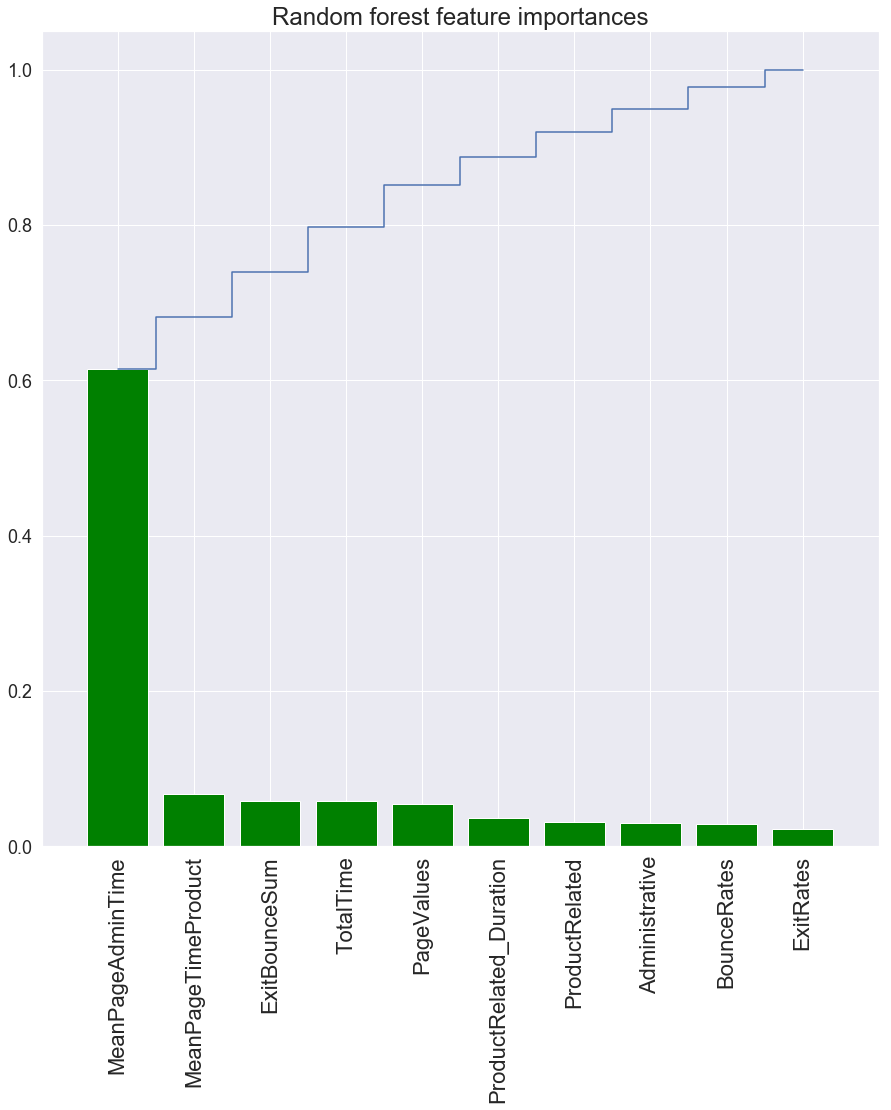

In [100]:
rf_model = forest_pipe.fit(x_train2,y_train)
feature_importances_rf = rf_model[2].feature_importances_
colnames = x_train2.columns


# Graphing feature importance random forest

feature_importances1 = np.argsort(feature_importances_rf)[::-1]
plt.title("Random forest feature importances",fontsize=24)
plt.bar(range(len(feature_importances1)), feature_importances_rf[feature_importances1], color='green',  align="center")
plt.xticks(range(len(feature_importances1)), colnames,fontsize=22 ,rotation='vertical',)
plt.yticks(fontsize=18)
plt.step(range(len(feature_importances1)), np.cumsum(feature_importances_rf[feature_importances1]), where='mid')
plt.xlim([-1, len(feature_importances1)])



(-1, 10)

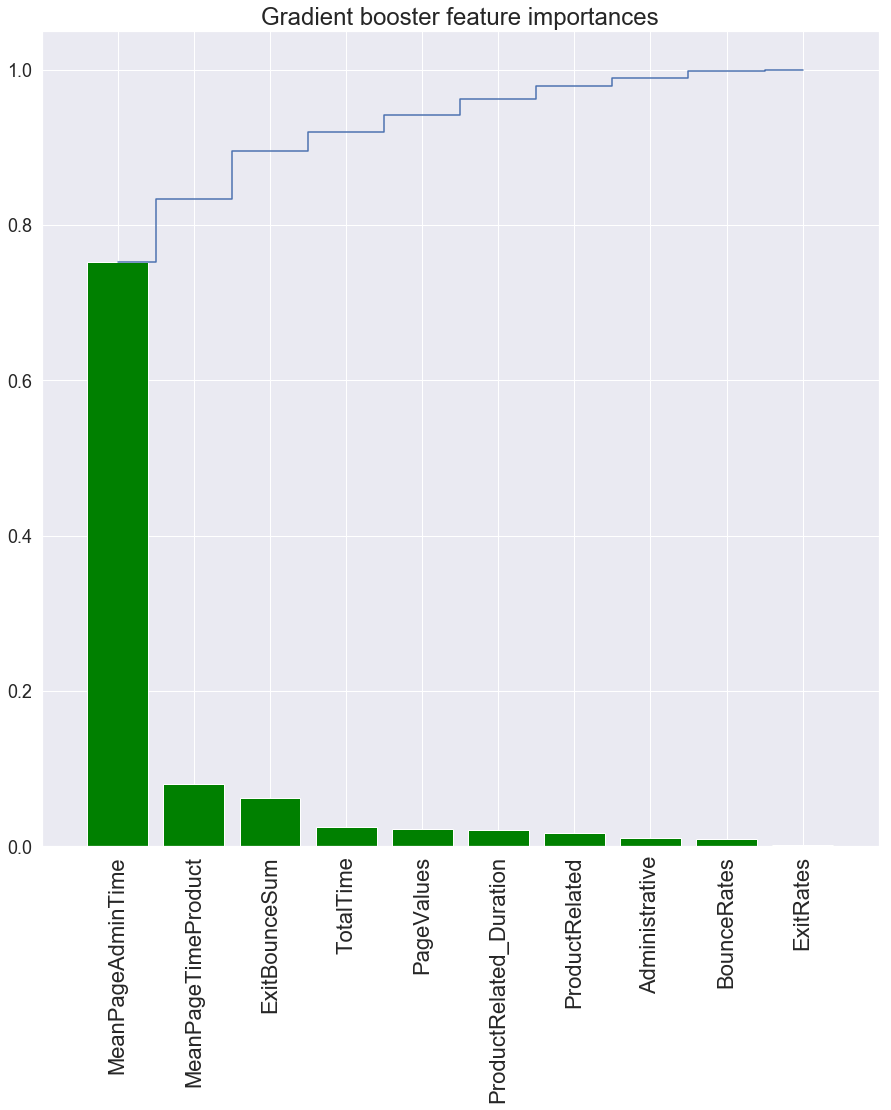

In [101]:
# Feature importance gradient booster
gb_model = gb_pipe.fit(x_train2,y_train)
feature_importances_gb = gb_model[2].feature_importances_

# Graphing feature importance gradient booster
feature_importances2 = np.argsort(feature_importances_gb)[::-1]
plt.title("Gradient booster feature importances",fontsize=24)
plt.bar(range(len(feature_importances2)), feature_importances_gb[feature_importances2], color='green',  align="center")
plt.yticks(fontsize=18)
plt.xticks(range(len(feature_importances2)), colnames,fontsize=22, rotation='vertical',)
plt.step(range(len(feature_importances2)), np.cumsum(feature_importances_gb[feature_importances2]), where='mid')
plt.xlim([-1, len(feature_importances2)])
